# PHASE 1- AVOCADO PROJECT

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


-Steps followed in the project-

We need to apply feature engineering/ EDA on the dataset. After that you can split the dataset into train_model and test_model; use this train_model to train our model and test_model to validate our model.

After splitting the dataset we need to train at least 4-5 models.

Check performance of each model

For classification problem- create classification models and check confusion matrix, classification report, accuracy and plot AUC_ROC.

Check the cross validation score for each model(for classification as well as for regression model).

Choose the model as the best model.

For classification problem- model with least difference between performance parameters and cross validation computed on same performance parameter is the best model. Example- Difference between accuracy and cross validation computed on accuracy scoring parameter.

Perform hyper parameter tuning on the best model and check performance of the best model.

Save the best model.

-Steps in EDA and Preprocessing:

Identification of variables and data types

Analyzing the basic metrics

Non-Graphical Univariate Analysis

Missing value treatment

Graphical Univariate Analysis

Bivariate Analysis

Encoding the categorical Data

Outlier treatment

Variable transformations

Correlation Analysis

Dimensionality Reduction

Use of Resampling Techniques to handle Imbalanced Data (For classification problem only)

Scaling of Independent features

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [8]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [9]:
df.shape

(18249, 13)

In [10]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

As seen in data set there is one index column which does not play any important role for prediction in the price of avocado, so I am dropping that column.
Also, I am checking the shape of the data set as there are 18249 rows and 13 columns after deleting the index column.
Also, most of the column are of same data type that is float and Date, type and region is of object data type.


Checking null values in our dataset-

<AxesSubplot:>

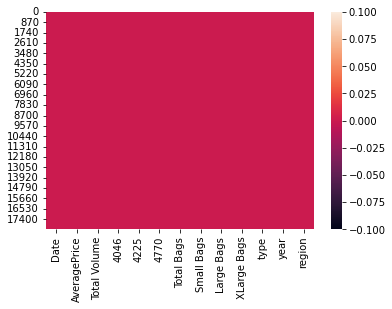

In [11]:
import seaborn as sns
sns.heatmap(df.isnull())

Above I am checking the null values, as find there are no null values in the data set because the red color is distributed equally correspond to each column.


Describing the dataset-

In [12]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Above statistics data show that their multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction
Also, number of rows in each column are same, means there are no null values in the data set.
Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other.
Most of the column statistics data are near to 0 values.
By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

EDA-

UNIVARIATE ANALYSIS

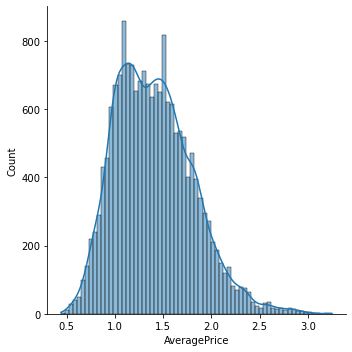

In [13]:
sns.displot(df['AveragePrice'],kde=True)

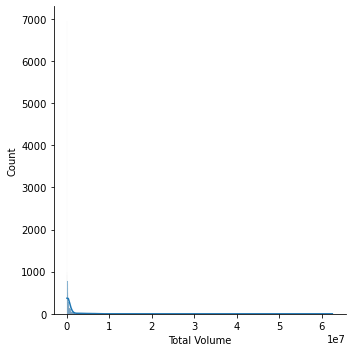

In [14]:
sns.displot(df['Total Volume'],kde=True)

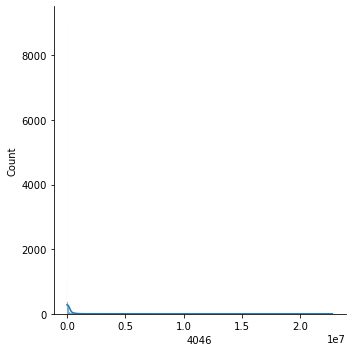

In [15]:
sns.displot(df['4046'],kde=True)

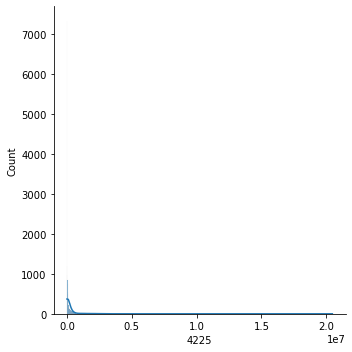

In [16]:
sns.displot(df['4225'],kde=True)

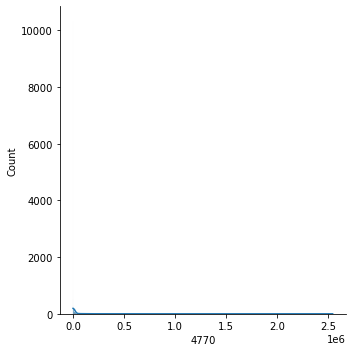

In [17]:
sns.displot(df['4770'],kde=True)

In [ ]:
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object

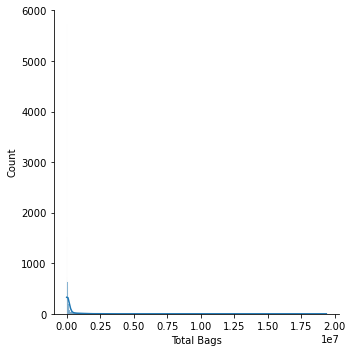

In [18]:
sns.displot(df['Total Bags'],kde=True)

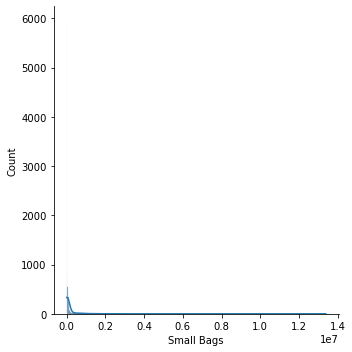

In [19]:
sns.displot(df['Small Bags'],kde=True)

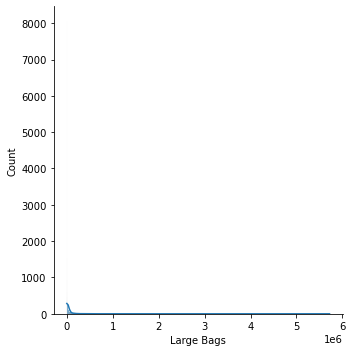

In [20]:
sns.displot(df['Large Bags'],kde=True)

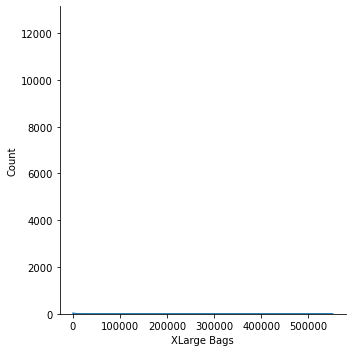

In [21]:
sns.displot(df['XLarge Bags'],kde=True)

conventional    9126
organic         9123
Name: type, dtype: int64


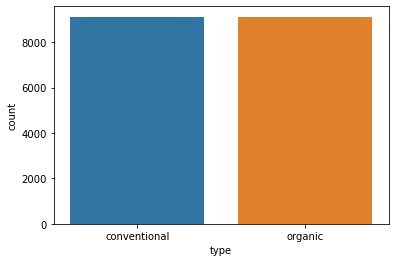

In [22]:
sns.countplot(x='type',data=df)
print(df['type'].value_counts())

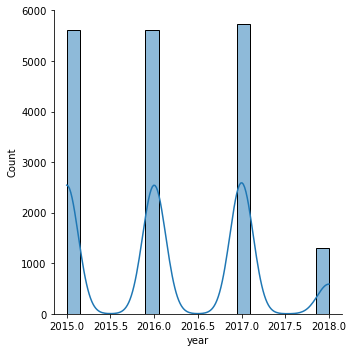

In [23]:
sns.displot(df['year'],kde=True)

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

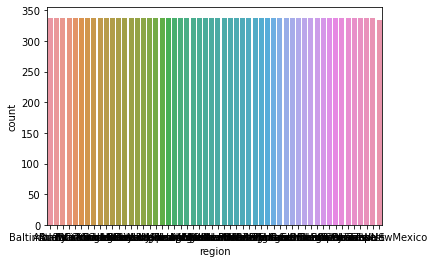

In [24]:
sns.countplot(x='region',data=df)
print(df['region'].value_counts())

BIVARIATE ANALYSIS-

<AxesSubplot:xlabel='type', ylabel='year'>

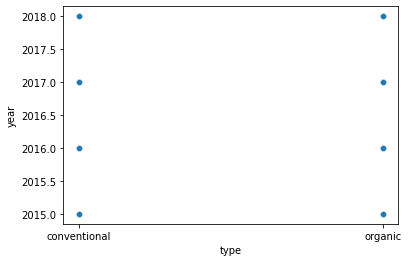

In [25]:
sns.scatterplot(x='type',y='year',data=df)

<AxesSubplot:xlabel='region', ylabel='year'>

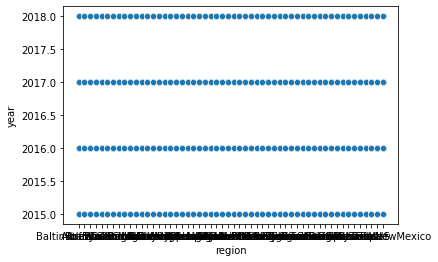

In [26]:
sns.scatterplot(x='region',y='year',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

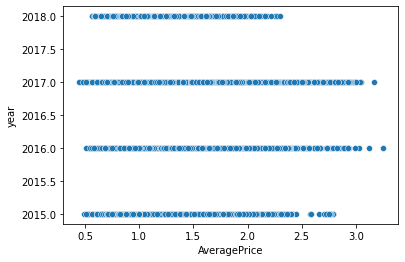

In [27]:
sns.scatterplot(x='AveragePrice',y='year',data=df)

<AxesSubplot:xlabel='4046', ylabel='year'>

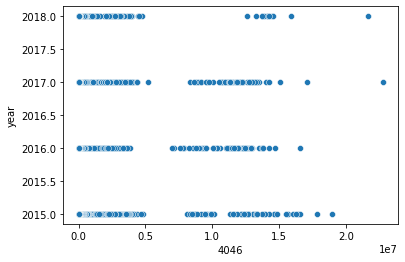

In [28]:
sns.scatterplot(x='4046',y='year',data=df)

<AxesSubplot:xlabel='4225', ylabel='year'>

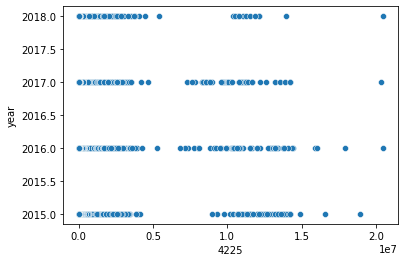

In [29]:
sns.scatterplot(x='4225',y='year',data=df)

<AxesSubplot:xlabel='4770', ylabel='year'>

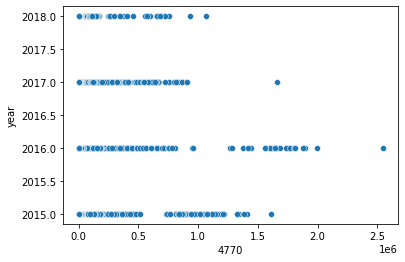

In [30]:
sns.scatterplot(x='4770',y='year',data=df)

MULTIVARIATE ANALYSIS-

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

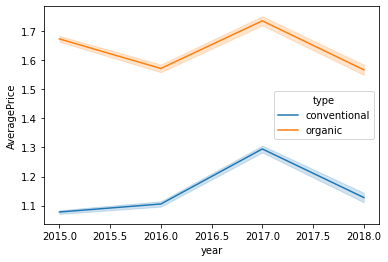

In [31]:
sns.lineplot(x='year',y='AveragePrice',hue='type',data=df)

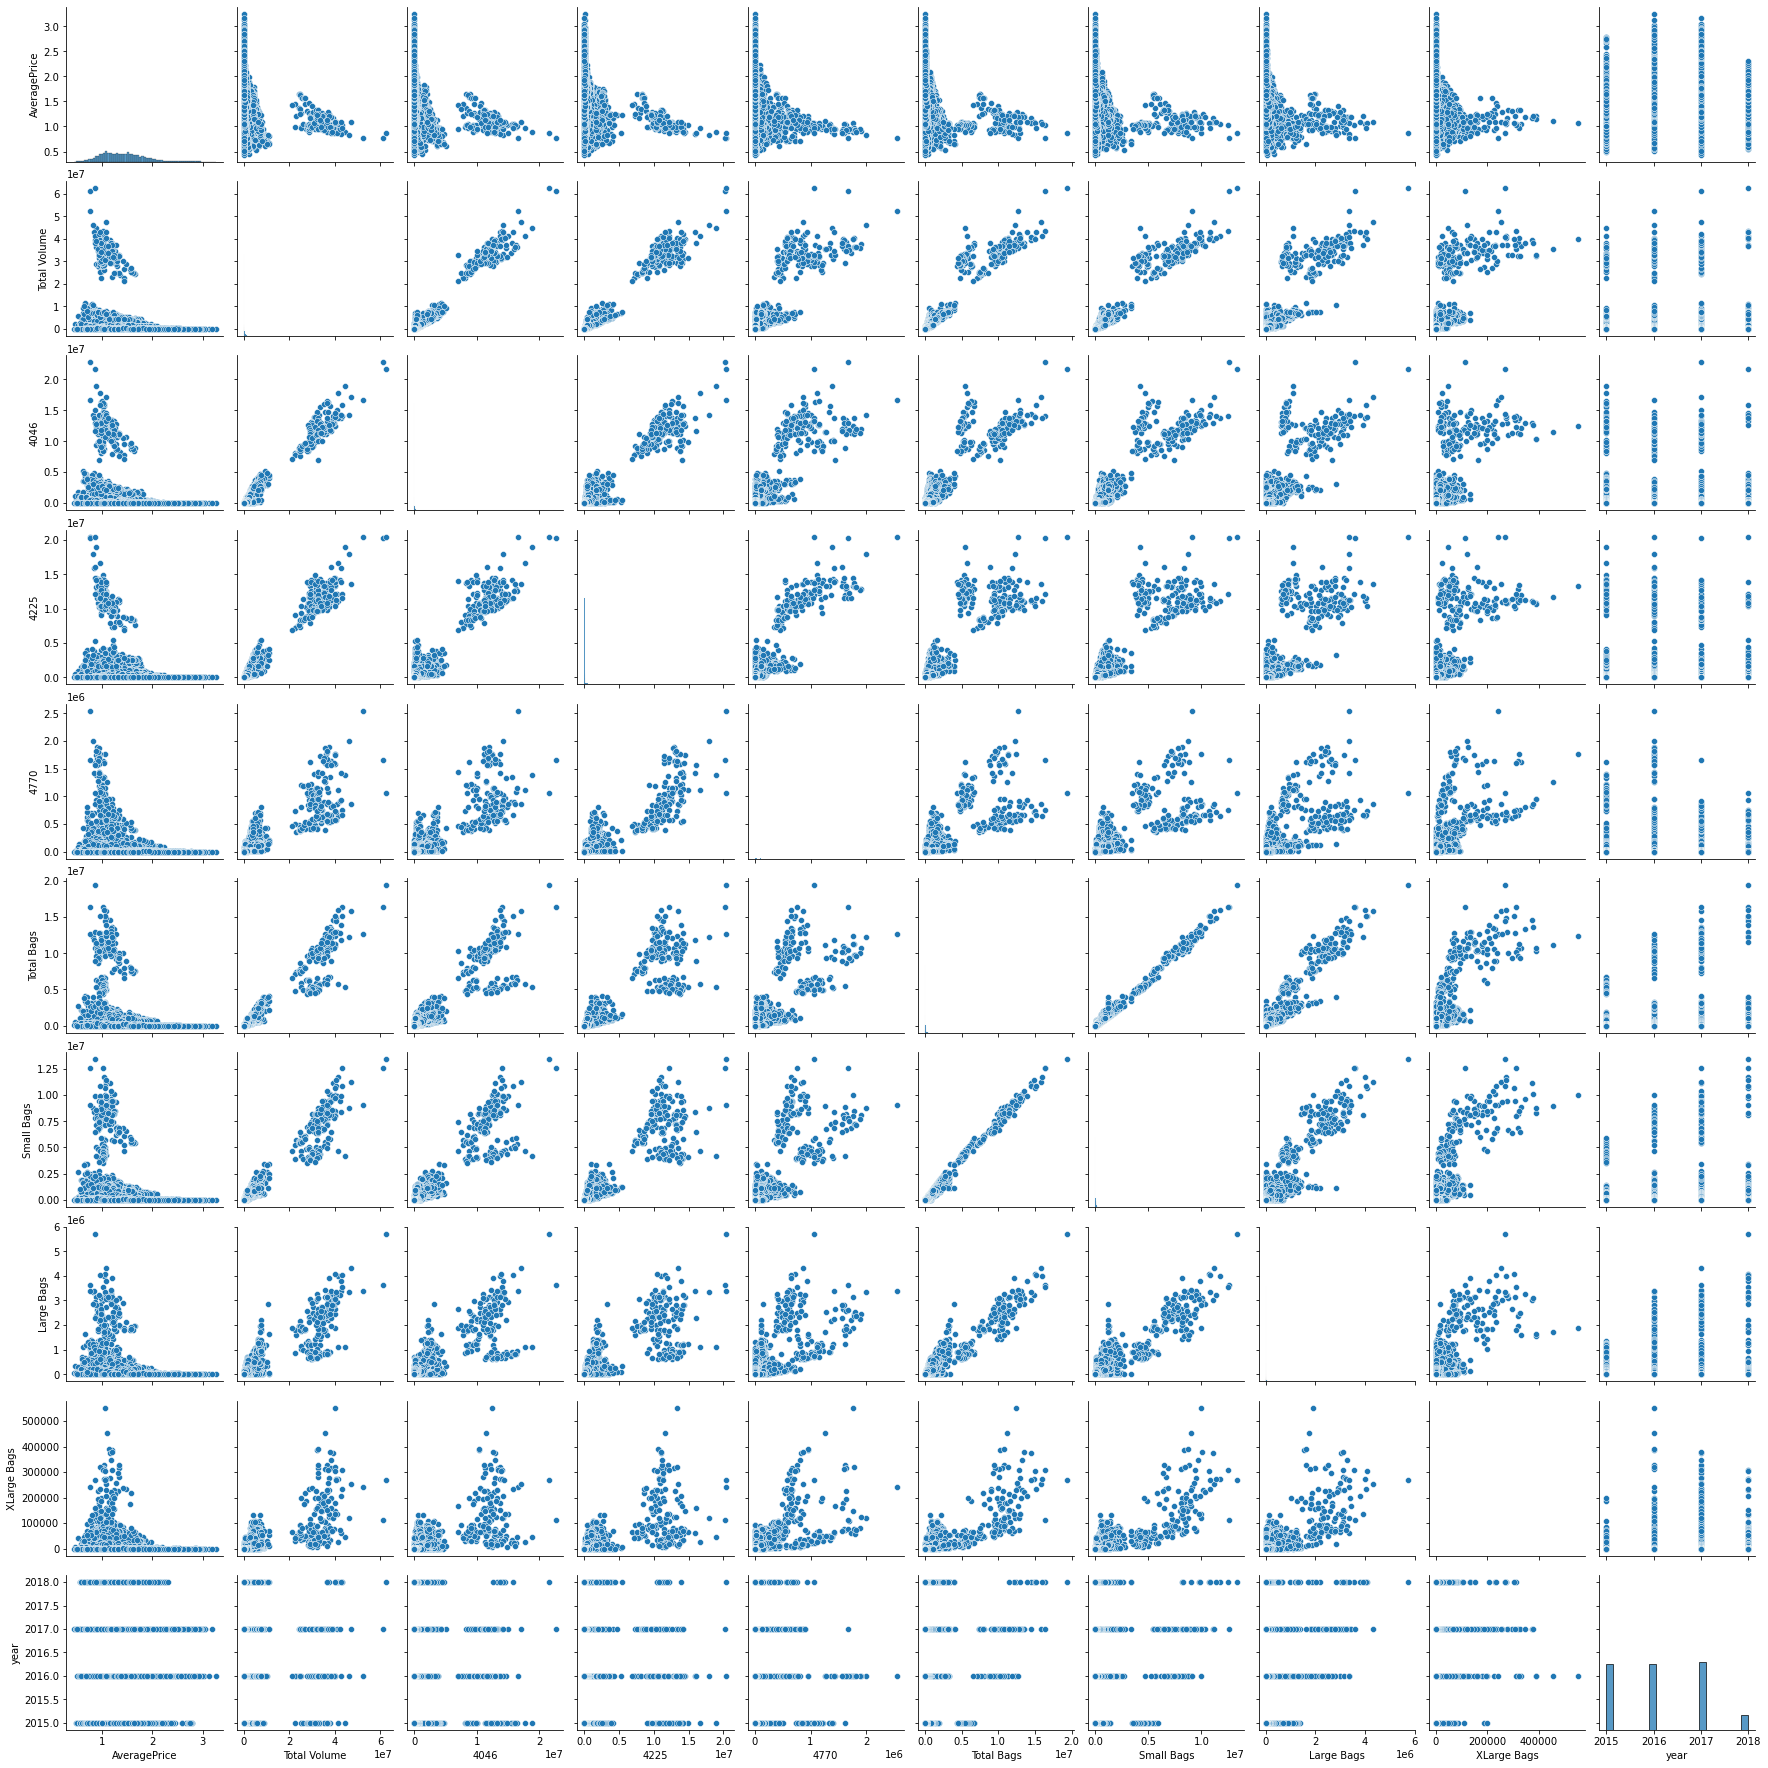

In [32]:
sns.pairplot(data=df)

Encoding the dataset-

In [36]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [37]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [38]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


Correlation-

In [39]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


Correlation using heatmap-

<AxesSubplot:>

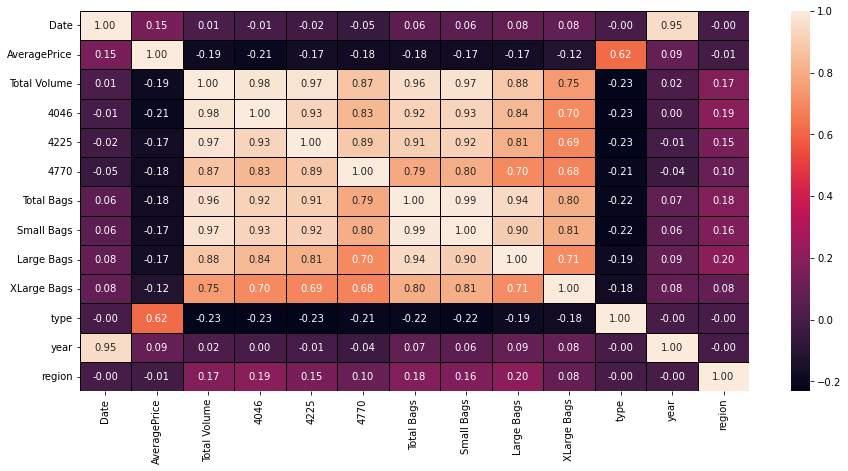

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

Outcome of Correlation-
We see that some data is positively correlated with the target data- Average Price, while some are negatively correlated to it. 

Describing Datasets-

In [41]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


THE MEAN IS GREATER THAN MEDIAN HERE, SO THE DATA IS RIGHT SKEWED

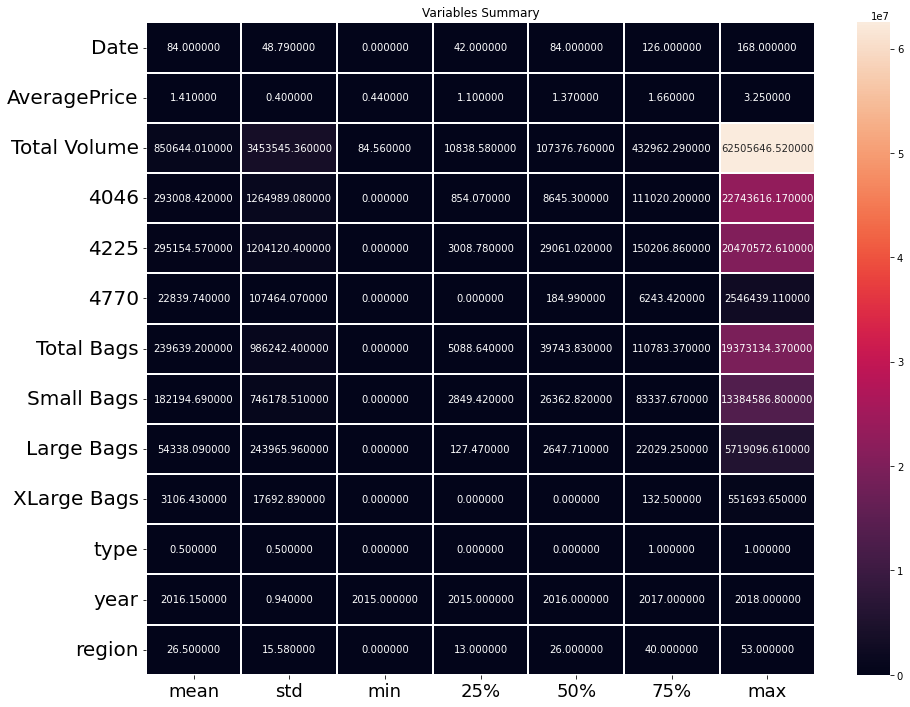

In [42]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.title('Variables Summary')
plt.show()

In [43]:
df.shape

(18249, 13)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  float64
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  float64
 11  year          18249 non-null  int64  
 12  region        18249 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.8 MB


From the above code we can have the columns datatype and the memory used by the dataframe.

FOR THE CLASSIFICATION MODEL WE TAKE REGION AS THE TARGET VARIABLE. SINCE THERE ARE MORE THAN 2 REGIONS, IT IS A MULTI CLASS CLASSIFICATION PROBLEM.

In [45]:
df['region'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53.])

Outliers checking-

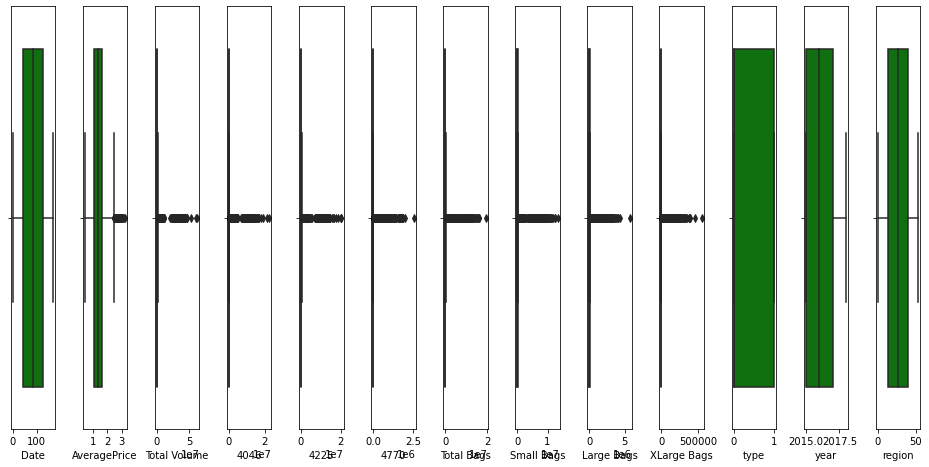

In [46]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Skewness-

In [47]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Outcome of skewness: Skewness threshold is taken as +/-0.65. 

Columns which are having skewness:

Total Volume

4046

4225

4770

Total Bags

Small Bags

Large Bags

XLarge Bags

Normal Distribution Curve-

<AxesSubplot:xlabel='region', ylabel='Density'>

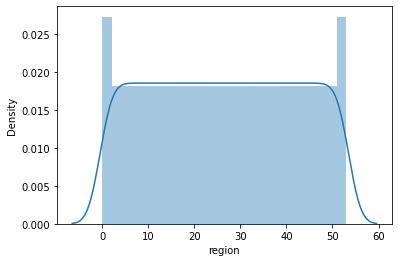

In [48]:
sns.distplot(df['region'])

The data of the column is not normalised. The building blocks is out of the normalised curve.

Data cleaning-

In [49]:
delete=pd.DataFrame([['10.159396','4770','No','Alot'],['13.139751','XLarge Bags','No','Alot']],columns=['Correlation with Target','Column Name','Normalised','Outliers'])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,10.159396,4770,No,Alot
1,13.139751,XLarge Bags,No,Alot


Here, we are setting threshold of correlation as +/-10.0. It is not standard, the dataset demands.

In [51]:
df=df.drop(['Date','4770','XLarge Bags'],axis=1)
df

,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,9505.56,9408.07,97.49,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,8145.35,8042.21,103.14,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,6183.95,5986.26,197.69,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,13498.67,13066.82,431.85,1.0,2018,53.0
18245,1.71,13888.04,1191.70,3431.50,9264.84,8940.04,324.80,1.0,2018,53.0
18246,1.87,13766.76,1191.92,2452.79,9394.11,9351.80,42.31,1.0,2018,53.0
18247,1.93,16205.22,1527.63,2981.04,10969.54,10919.54,50.00,1.0,2018,53.0


Along with data cleaning we also remove the Date column as, it is unique to each avocado and different which can lead to inaccuracy and errors.

In [52]:
df.shape

(18249, 10)

Dividing data in features and vectors:

Removing outliers-

Z-score Technique:

In [53]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

x is independent variable and y is target variable.

In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(18249, 9)

In [55]:
threshold=3
print(np.where(z>3))

(array([  346,   359,  1516, ..., 17304, 17402, 17428]), array([2, 2, 3, ..., 0, 0, 0]))


In [56]:
x=x[(z<3).all(axis=1)]
x.shape

(17823, 9)

In [57]:
y=y[(z<3).all(axis=1)]
y.shape

(17823,)

Percentage data loss-

In [58]:
loss_percent=(18249-17823)/18249*100
print(loss_percent)

2.3343744862732203


Checking whether how much outliers are still there. If the outliers there help in the testing of model or not.

Transforming data to remove skewness-

In [59]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [60]:
x

array([[-1.07419856e-01, -8.92463522e-02, -6.65923560e-01, ...,
        -7.89467189e-01, -1.00907444e+00, -1.30717659e-12],
       [-5.39439815e-02, -1.60550983e-01, -7.84733888e-01, ...,
        -7.79572283e-01, -1.00907444e+00, -1.30717659e-12],
       [-1.29078553e+00,  1.87909272e-01, -7.39682613e-01, ...,
        -7.66973241e-01, -1.00907444e+00, -1.30717659e-12],
       ...,
       [ 1.19121985e+00, -7.82303853e-01, -6.26796758e-01, ...,
        -9.58057116e-01,  9.91007162e-01,  2.12757589e-12],
       [ 1.31949864e+00, -7.09389025e-01, -5.56448709e-01, ...,
        -9.23583956e-01,  9.91007162e-01,  2.12757589e-12],
       [ 6.24830131e-01, -6.75248935e-01, -3.70826283e-01, ...,
        -1.05487158e+00,  9.91007162e-01,  2.12757589e-12]])

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.10741986, -0.08924635, -0.66592356, ..., -0.78946719,
        -1.00907444, -1.21311315],
       [-0.05394398, -0.16055098, -0.78473389, ..., -0.77957228,
        -1.00907444, -1.21311315],
       [-1.29078553,  0.18790927, -0.73968261, ..., -0.76697324,
        -1.00907444, -1.21311315],
       ...,
       [ 1.19121985, -0.78230385, -0.62679676, ..., -0.95805712,
         0.99100716,  1.97465553],
       [ 1.31949864, -0.70938903, -0.55644871, ..., -0.92358396,
         0.99100716,  1.97465553],
       [ 0.62483013, -0.67524893, -0.37082628, ..., -1.05487158,
         0.99100716,  1.97465553]])

Oversampling the data-

In [62]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [63]:
y.value_counts()

0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
52.0    338
53.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
51.0    338
Name: region, dtype: int64

CLASSIFICATION MODEL-

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

Splitting the dataframe-

In [66]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,i)==round(accuracy_score(y_test,pred_test)*100,i):
        print('At random state',i,'The model performs very well')
        print('At random state: ',i)
        print('Training accuracy is:',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy is:',accuracy_score(y_test,pred_test)*100)

KeyboardInterrupt: 

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=307)

We take random state as 307 because the difference between training and testing accuracy is the least there.

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.03      0.03      0.03        64
         1.0       0.02      0.03      0.02        74
         2.0       0.01      0.01      0.01        75
         3.0       0.00      0.00      0.00        78
         4.0       0.09      0.10      0.10        69
         5.0       0.01      0.02      0.02        62
         6.0       0.03      0.03      0.03        75
         7.0       0.04      0.05      0.05        62
         8.0       0.02      0.01      0.01        71
         9.0       0.01      0.02      0.01        61
        10.0       0.00      0.00      0.00        68
        11.0       0.00      0.00      0.00        65
        12.0       0.03      0.04      0.03        72
        13.0       0.00      0.00      0.00        76
        14.0       0.02      0.01      0.02        70
        15.0       0.03      0.04      0.03        50
        16.0       0.03      0.03      0.03        62
        17.0       0.01    

Cross validation score-

In [69]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv:',j)
    print('Cross validation score is',lsc*100)
    print('Accuracy score is',lss*100)
    print('\n')

At cv: 2
Cross validation score is 9.111330265176418
Accuracy score is 49.90413585319091


At cv: 3
Cross validation score is 30.928117466579003
Accuracy score is 49.90413585319091


At cv: 4
Cross validation score is 31.78829717291256
Accuracy score is 49.90413585319091


At cv: 5
Cross validation score is 38.297341692837016
Accuracy score is 49.90413585319091


At cv: 6
Cross validation score is 38.214990138067066
Accuracy score is 49.90413585319091


At cv: 7
Cross validation score is 41.00928338959325
Accuracy score is 49.90413585319091


At cv: 8
Cross validation score is 41.77052911276748
Accuracy score is 49.90413585319091


At cv: 9
Cross validation score is 42.69121192198115
Accuracy score is 49.90413585319091




In [70]:
lsscore_selected=cross_val_score(lr,x,y,cv=9).mean()
print('The cv score is',lsscore_selected,'\n The accuracy score is',lss)

The cv score is 0.4269121192198115 
 The accuracy score is 0.49904135853190906


In [71]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8562037797863599
[[55  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  3]
 [ 0  1 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  1 51  0]
 [ 0  1  1 ...  0  0 52]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85        64
         1.0       0.77      0.76      0.76        74
         2.0       0.91      0.85      0.88        75
         3.0       0.91      0.86      0.88        78
         4.0       0.92      0.97      0.94        69
         5.0       0.87      0.77      0.82        62
         6.0       0.94      1.00      0.97        75
         7.0       0.83      0.79      0.81        62
         8.0       0.93      0.93      0.93        71
         9.0       0.93      0.89      0.91        61
        10.0       0.81      0.75      0.78        68
        11.0       0.82      0.94      0.88        65
        12.0       0.90      0.89      0.90        72
        13.0       0.76      0.79      0.77        76
        14.0  

In [72]:
score=cross_val_score(RFC,x,y,cv=9)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predRFC)-score.mean())

[0.7943787  0.7504931  0.77564103 0.80128205 0.66765286 0.5882643
 0.63362919 0.62426036 0.67455621]
0.7011286434363357
Difference between Accuracy score and cross validation score is:  0.15507513635002412


In [73]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7532182963571624
[[59  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  6]
 [ 0  0 65 ...  0  0  1]
 ...
 [ 0  0  0 ... 76  0  0]
 [ 0  0  0 ...  1 50  0]
 [ 0  5  3 ...  0  0 47]]
              precision    recall  f1-score   support

         0.0       0.67      0.92      0.78        64
         1.0       0.51      0.49      0.50        74
         2.0       0.83      0.87      0.85        75
         3.0       0.98      0.68      0.80        78
         4.0       0.91      0.90      0.91        69
         5.0       0.80      0.71      0.75        62
         6.0       0.92      0.95      0.93        75
         7.0       0.55      0.66      0.60        62
         8.0       0.94      0.87      0.91        71
         9.0       0.65      0.87      0.75        61
        10.0       0.60      0.63      0.61        68
        11.0       0.79      0.89      0.84        65
        12.0       0.79      0.86      0.83        72
        13.0       0.66      0.49      0.56        76
        14.0  

Checking cv score for Support vector machine classifier-

In [74]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predsvc)-score.mean())

[0.59901397 0.72747193 0.66109589 0.60136986 0.41616438]
0.6010232062523685
Difference between Accuracy score and cross validation score is:  0.15219509010479393


Checking accuracy score for Gradient Boosting Classifier-

In [75]:
GB= GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7710216379074226
[[54  0  0 ...  0  0  0]
 [ 0 42  1 ...  0  0  3]
 [ 0  0 65 ...  0  0  1]
 ...
 [ 0  0  0 ... 75  0  0]
 [ 0  0  0 ...  1 50  0]
 [ 0  5  2 ...  0  0 50]]
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.82        64
         1.0       0.68      0.57      0.62        74
         2.0       0.84      0.87      0.86        75
         3.0       0.86      0.79      0.83        78
         4.0       0.88      0.91      0.89        69
         5.0       0.78      0.74      0.76        62
         6.0       0.91      0.91      0.91        75
         7.0       0.69      0.69      0.69        62
         8.0       0.98      0.87      0.93        71
         9.0       0.86      0.89      0.87        61
        10.0       0.63      0.59      0.61        68
        11.0       0.77      0.83      0.80        65
        12.0       0.81      0.81      0.81        72
        13.0       0.68      0.66      0.67        76
        14.0  

Checking cv score for Gradient Boosting Classifier-

In [76]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is: ',accuracy_score(y_test,predGB)-score.mean())

KeyboardInterrupt: 

We see that SVC is the best model here because it has the least difference between Accuracy score and Cross Validation Score which is 0.15219509010479393.

Hyper parameter tuning-

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid={'C': [0.1,1,10,100,1000],
           'gamma': [1,0.1,0.01,0.001,0.0001],
           'kernel': ['rbf']}

In [79]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [80]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=  20.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=  21.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.676 total time=  21.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=  20.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.680 total time=  23.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.435 total time=  21.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.430 total time=  23.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.440 total time=  29.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.453 total time=  34.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.440 total time=  34.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.052 total time=  46.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [81]:
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [82]:
print(grid.best_estimator_)

SVC(C=10, gamma=1)


In [83]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([26., 21., 48., ..., 10., 10., 53.])

In [84]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        64
         1.0       0.82      0.78      0.80        74
         2.0       0.96      0.96      0.96        75
         3.0       0.90      0.92      0.91        78
         4.0       0.97      0.99      0.98        69
         5.0       0.90      0.85      0.88        62
         6.0       1.00      0.97      0.99        75
         7.0       0.88      0.79      0.83        62
         8.0       1.00      0.94      0.97        71
         9.0       0.90      0.85      0.87        61
        10.0       0.81      0.79      0.80        68
        11.0       0.83      0.95      0.89        65
        12.0       0.93      0.89      0.91        72
        13.0       0.90      0.84      0.87        76
        14.0       0.95      0.90      0.93        70
        15.0       0.94      0.94      0.94        50
        16.0       0.89      0.87      0.88        62
        17.0       0.83    

Accuracy score is 88%

AUC ROC CURVE-

It is used on Binary classification models. Since our model is a multiclass classification model, we will not plot it.

Model Saving-

In [86]:
import pickle
filename='inhouse_avocado.pk1'
pickle.dump(lr,open(filename,'wb'))

Conclusion-

In [87]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com

,original,predicted
0,26.0,10.0
1,21.0,19.0
2,48.0,26.0
3,27.0,20.0
4,40.0,33.0
...,...,...
3646,40.0,40.0
3647,45.0,45.0
3648,10.0,44.0
3649,10.0,10.0


We can visualize that there is very minimal error in the outcome using the above model.

REGRESSION MODEL-

Separating the columns into features and target-

In [88]:
features=df.drop('AveragePrice',axis=1)
target=df['AveragePrice']

Scaling the data using MinMax scaler-

In [89]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=1)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f'At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:- 0.40570001265915734
At random state 0,the testing accuracy is:- 0.410198741691273


At random state 1,the training accuracy is:- 0.40570001265915734
At random state 1,the testing accuracy is:- 0.410198741691273


At random state 2,the training accuracy is:- 0.40570001265915734
At random state 2,the testing accuracy is:- 0.410198741691273


At random state 3,the training accuracy is:- 0.40570001265915734
At random state 3,the testing accuracy is:- 0.410198741691273


At random state 4,the training accuracy is:- 0.40570001265915734
At random state 4,the testing accuracy is:- 0.410198741691273


At random state 5,the training accuracy is:- 0.40570001265915734
At random state 5,the testing accuracy is:- 0.410198741691273


At random state 6,the training accuracy is:- 0.40570001265915734
At random state 6,the testing accuracy is:- 0.410198741691273


At random state 7,the training accuracy is:- 0.40570001265915734
At random state 7,the testing ac

In [92]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [93]:
lr.fit(features_train,target_train)

LinearRegression()

In [94]:
pred_test=lr.predict(features_test)

In [95]:
print(r2_score(target_test,pred_test))

0.422827916164046


Cross validation of the model-

In [96]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is -5292.747298723702 and accuracy score for training is -0.4152318113614364 and accuracy for the testing is 0.422827916164046


At cross fold 3 the cv score is -0.08232555575462486 and accuracy score for training is -0.4152318113614364 and accuracy for the testing is 0.422827916164046


At cross fold 4 the cv score is -0.5324400872837219 and accuracy score for training is -0.4152318113614364 and accuracy for the testing is 0.422827916164046


At cross fold 5 the cv score is 0.035360014494583855 and accuracy score for training is -0.4152318113614364 and accuracy for the testing is 0.422827916164046


At cross fold 6 the cv score is -0.0813061302738962 and accuracy score for training is -0.4152318113614364 and accuracy for the testing is 0.422827916164046


At cross fold 7 the cv score is 0.013610232376242053 and accuracy score for training is -0.4152318113614364 and accuracy for the testing is 0.422827916164046


At cross fold 8 the cv score is -0.049145821

Here, we have handled the problem of the overfitting and the underfitting by checking the training and testing score.

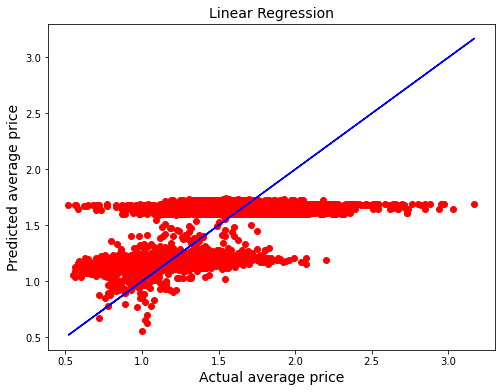

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual average price',fontsize=14)
plt.ylabel('Predicted average price',fontsize=14)
plt.title('Linear Regression',fontsize=14)
plt.savefig('lr.png')
plt.show()

Best fit line is covering most of the datapoints which shows good fit of our model.
Equation of the line is: y=mx+c

Regularization-

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha': [.0001, .001, .01, .1, 1, 10],
           'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


Final model training-

In [100]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls_score_training=ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
ls_score_training*100

40.04750120193138

Ensemble technique-

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [102]:
parameters={'criterion': ['mse','mae'],
           'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

KeyboardInterrupt: 

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision= rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,features,target,cv=5)
rfc= rfscore.mean()
print('Cross val score:',rfc*100)

KeyboardInterrupt: 

We are getting model accuracy and cross validation both above 40% which shows our model is performing good.

Saving the file-

In [105]:
import pickle
filename='averageprice.pkl'
pickle.dump(rf, open(filename, 'wb'))

Conclusion-

In [106]:
loaded_model=pickle.load(open('averageprice.pkl','rb'))
result=loaded_model.score(features_test,target_test)
print(result*100)

ValueError: Input contains NaN.

In [ ]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

THE END

COULD NOT COMPLETE LR PART AS THE KERNEL WAS HANGING AGAIN AND AGAIN. WRITTEN THE CODES FOR IT.